In [41]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sn


In [5]:
df = pd.read_csv("US-pumpkins.csv")
df

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.00,280.00,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.00,280.00,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.00,160.00,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.00,160.00,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.00,100.00,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,ST. LOUIS,NaN,22 lb cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,14.75,14.75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1753,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/26/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1754,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/27/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,STEADY.
1755,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/28/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,ABOUT STEADY.


In [7]:
# check for NaNs
df.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [25]:
pd.set_option("display.max_rows",2000)
# predict the price of pumpkin given a month
# lets extract what we need
pump=df[['Package','Date','Low Price', 'High Price']]
pump["Price"] = (pump['High Price'] + pump['Low Price']) /2
pump['Month'] = pd.DatetimeIndex(pump['Date']).month
pump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Package     1757 non-null   object 
 1   Date        1757 non-null   object 
 2   Low Price   1757 non-null   float64
 3   High Price  1757 non-null   float64
 4   Price       1757 non-null   float64
 5   Month       1757 non-null   int32  
dtypes: float64(3), int32(1), object(2)
memory usage: 75.6+ KB


In [31]:
new_pumpkins=pump[pump['Package'].str.contains('bushel',case=True,regex=True)]
new_pumpkins.reset_index(inplace=True, drop=True)
new_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Package     415 non-null    object 
 1   Date        415 non-null    object 
 2   Low Price   415 non-null    float64
 3   High Price  415 non-null    float64
 4   Price       415 non-null    float64
 5   Month       415 non-null    int32  
dtypes: float64(3), int32(1), object(2)
memory usage: 18.0+ KB


In [36]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'),'Price'] = new_pumpkins['Price'] / (1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'),'Price'] = new_pumpkins['Price'] / (1/2)
new_pumpkins

,Package,Date,Low Price,High Price,Price,Month
0,1 1/9 bushel cartons,9/24/16,15.00,15.00,12.1500,9
1,1 1/9 bushel cartons,9/24/16,18.00,18.00,14.5800,9
2,1 1/9 bushel cartons,10/1/16,18.00,18.00,14.5800,10
3,1 1/9 bushel cartons,10/1/16,17.00,17.00,13.7700,10
4,1 1/9 bushel cartons,10/8/16,15.00,15.00,12.1500,10
5,1 1/9 bushel cartons,10/8/16,18.00,18.00,14.5800,10
6,1 1/9 bushel cartons,10/8/16,17.00,17.00,13.7700,10
7,1 1/9 bushel cartons,10/8/16,17.00,18.50,14.3775,10
8,1 1/9 bushel cartons,10/15/16,15.00,15.00,12.1500,10
9,1 1/9 bushel cartons,10/15/16,17.00,17.00,13.7700,10


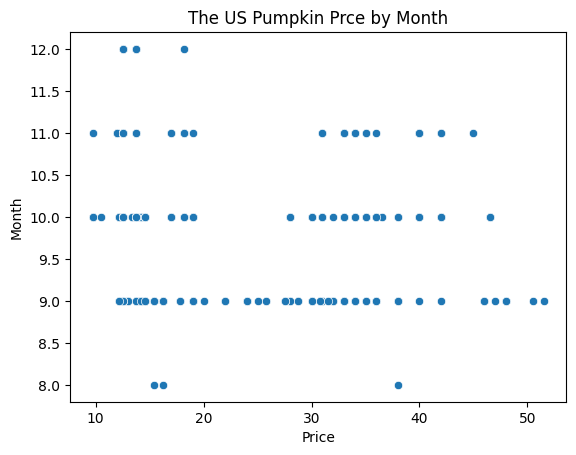

In [45]:
#Lets visualise pumpkins

sn.scatterplot(x='Price',y='Month',data=new_pumpkins)
plt.title("The US Pumpkin Prce by Month")
plt.show()



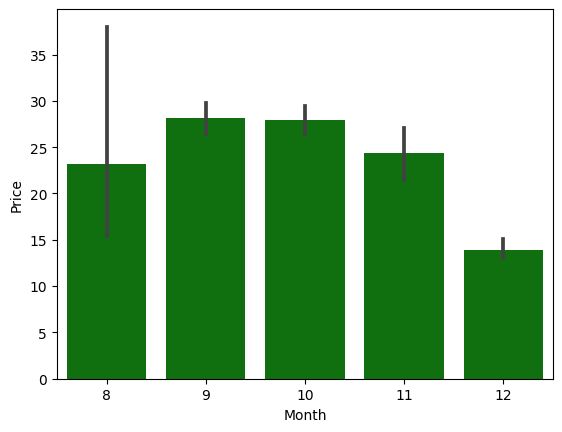

In [51]:
sn.barplot(x="Month",y="Price",data=new_pumpkins,color="g")
plt.show()

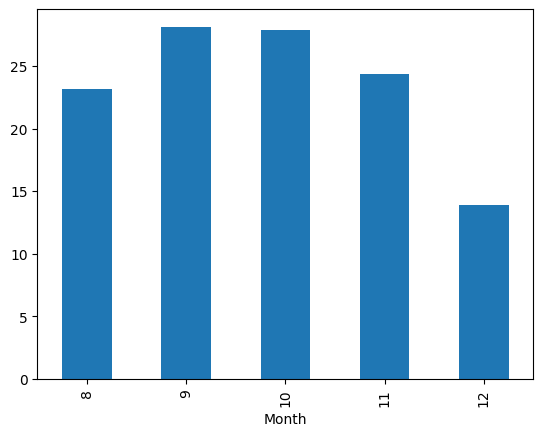

In [49]:
new_pumpkins.groupby('Month')['Price'].mean().plot(kind='bar')
plt.show()